In [9]:
import geopandas as gpd
from sqlalchemy import create_engine

In [10]:
import arcpy

In [11]:
import os

In [12]:
path = 'X:/Projects/RLID/BusinessData/InfoUSA/2020/June/Geocoded.gdb'

In [80]:
business = gpd.read_file(path, layer="June2020")

In [81]:
fullfields = list(business)

In [82]:
fields = [field.replace("RLID_Business_dbo_BUSINESS_", "") for field in fullfields]

In [83]:
fields

['business_name',
 'business_desc',
 'address',
 'city',
 'state',
 'zip',
 'zip_plus4',
 'zip_full',
 'county',
 'carrier_route',
 'delivery_point_bar_code',
 'neighborhood',
 'phone',
 'phone_toll_free',
 'fax',
 'website',
 'primary_sic_code',
 'primary_sic_desc',
 'sic_code_1',
 'sic_code_1_desc',
 'sic_code_2',
 'sic_code_2_desc',
 'sic_code_3',
 'sic_code_3_desc',
 'sic_code_4',
 'sic_code_4_desc',
 'naics_industry_code_group',
 'naics_industry_desc',
 'primary_naics',
 'primary_naics_desc',
 'naics_1',
 'naics_1_desc',
 'naics_2',
 'naics_2_desc',
 'naics_3',
 'naics_3_desc',
 'naics_4',
 'naics_4_desc',
 'cuisine_code',
 'cuisine_code_desc',
 'location_employee_size_code',
 'location_employee_size_range',
 'location_employee_size_actual',
 'business_type',
 'credit_score',
 'twitter',
 'facebook',
 'linkedin',
 'googleplus',
 'location_type',
 'infousa_number',
 'date_updated',
 'years_in_database',
 'year_established',
 'sqft',
 'home_business',
 'latitude',
 'longitude',
 'go

In [12]:
business['RLID_Business_dbo_BUSINESS_location_employee_size_actual'].astype(int).describe()

count    14980.000000
mean         9.757677
std         43.799456
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max       3500.000000
Name: RLID_Business_dbo_BUSINESS_location_employee_size_actual, dtype: float64

In [15]:
business.crs

<Projected CRS: EPSG:2914>
Name: NAD83(HARN) / Oregon South (ft)
Axis Info [cartesian]:
- X[east]: Easting (foot)
- Y[north]: Northing (foot)
Area of Use:
- name: United States (USA) - Oregon - counties of Coos; Crook; Curry; Deschutes; Douglas; Harney; Jackson; Josephine; Klamath; Lake; Lane; Malheur.
- bounds: (-124.6, 41.98, -116.9, 44.56)
Coordinate Operation:
- name: SPCS83 Oregon South zone (International feet)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
business = business.to_crs(epsg=3857)

In [17]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [13]:
outpath = "//clsrv111.int.lcog.org/transpor/MPO/RTP/FY20 2045 Update/Data and Resources/Data"

In [25]:
business.to_file(os.path.join(outpath, "business.shp"))

In [26]:
arcpy.analysis.Clip(os.path.join(outpath, "business.shp"), 
                    "V:/Data/Transportation/MPO_Bound.shp", 
                    os.path.join(outpath, "business_MPO.shp"))

<Result '\\\\clsrv111.int.lcog.org\\transpor\\MPO\\RTP\\FY20 2045 Update\\Data and Resources\\Data\\business_MPO.shp'>

In [86]:
business = gpd.read_file(os.path.join(outpath, "business_MPO.shp")) 

In [87]:
business.columns = fields

In [56]:
def standardization(x):
    z = (x - min(x))/(max(x) - min(x))
    return(z)

In [57]:
type(business['location_employee_size_actual'].astype(int))

pandas.core.series.Series

In [62]:
values = standardization(business['location_employee_size_actual'].astype(int)) * 1000

In [63]:
values

0        1.714286
1        0.857143
2        3.142857
3        1.142857
4        0.571429
           ...   
10785    1.428571
10786    2.000000
10787    0.571429
10788    0.285714
10789    2.857143
Name: location_employee_size_actual, Length: 10790, dtype: float64

In [59]:
business.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [60]:
business.head()

,business_name,business_desc,address,city,state,zip,zip_plus4,zip_full,county,carrier_route,...,location_sales_volume_range,location_sales_volume_actual,lcog_corrected_address,lcog_corrected_city,address_match_score,address_geofeature_id,address_match_type,address_match_desc,date_row_inserted,geometry
0,#1 Northwest Inc,None,3879 Cross St,Eugene,OR,97402,2421,97402-2421,Lane,C007,...,$1-2.5 Million,2190000,None,None,1.0,31571.0,Matched,Exactly one address found by matching address ...,2020-07-14T14:27:08+00:00,POINT (-13709938.844 5475232.456)
1,1-800-Radiator & A/C,None,900 Mckinley St # D,Eugene,OR,97402,2708,97402-2708,Lane,C034,...,"$500,000-1 Million",573000,None,None,1.0,1278844.0,Matched,Exactly one address found by matching address ...,2020-07-14T14:27:08+00:00,POINT (-13706795.059 5473155.917)
2,1000 Friends Of Oregon,None,220 E 11th Ave # 5,Eugene,OR,97401,3370,97401-3370,Lane,C010,...,"Less Than $500,000",465000,None,None,1.0,87799.0,Matched,Matched; No address components were changed; ;...,2020-07-14T14:27:08+00:00,POINT (-13702229.706 5472802.429)
3,13th Avenue Market,None,410 W 13th Ave,Eugene,OR,97401,3445,97401-3445,Lane,C012,...,"$500,000-1 Million",969000,None,None,1.0,89419.0,Matched,Exactly one address found by matching address ...,2020-07-14T14:27:08+00:00,POINT (-13703277.098 5472468.940)
4,1414 Kincaid LLC,None,1414 Kincaid St,Eugene,OR,97401,8145,97401-8145,Lane,C042,...,"Less Than $500,000",221000,None,None,2.0,51081.0,Matched to Structure(s),Matched to another address (e.g. apartment or ...,2020-07-14T14:27:08+00:00,POINT (-13701083.395 5472295.740)


In [84]:
shortfields = ['name',
 'desc',
 'address',
 'city',
 'state',
 'zip',
 'zip_plus4',
 'zip_full',
 'county',
 'route',
 'bar_code',
 'neighbor',
 'phone',
 'toll_free',
 'fax',
 'website',
 'sic_code',
 'sic_desc',
 'sic_code_1',
 'code1desc',
 'sic_code_2',
 'code2desc',
 'sic_code_3',
 'code3desc',
 'sic_code_4',
 'code4desc',
 'naics_grop',
 'industry',
 'naics',
 'naics_desc',
 'naics_1',
 'naics1desc',
 'naics_2',
 'naics2desc',
 'naics_3',
 'naics3desc',
 'naics_4',
 'naics4desc',
 'cuisicode',
 'cuisicodds',
 'empl_siz_c',
 'empl_siz_r',
 'empl_siz_a',
 'busi_type',
 'cred_score',
 'twitter',
 'facebook',
 'linkedin',
 'googleplus',
 'loc_type',
 'info_numb',
 'date_updtd',
 'yrs_in_db',
 'yr_esta',
 'sqft',
 'home_busi',
 'latitude',
 'longitude',
 'gov_office',
 'centerpt',
 'fir_or_ind',
 'fran_desc',
 'exec_fname',
 'exec_lname',
 'exec_title',
 'exec_comb',
 'exec_gende',
 'mail_addrs',
 'mail_city',
 'mail_state',
 'mail_zip',
 'mailzippl4',
 'mailzipful',
 'mail_route',
 'mailbarcod',
 'blockgroup',
 'cens_tract',
 'recrd_type',
 'sales_v_c',
 'sales_v_r',
 'sales_v_a',
 'corr_addr',
 'corr_city',
 'adr_mat_s',
 'adr_geo_id',
 'adr_mat_t',
 'adr_mat_d',
 'date_insrt',
 'geometry']

In [85]:
business.columns = shortfields

In [79]:
business.to_file(os.path.join(outpath, "business_MPO.shp"))

In [47]:
type(business)

geopandas.geodataframe.GeoDataFrame

In [35]:
import matplotlib.pyplot as plt
import contextily as ctx

In [37]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

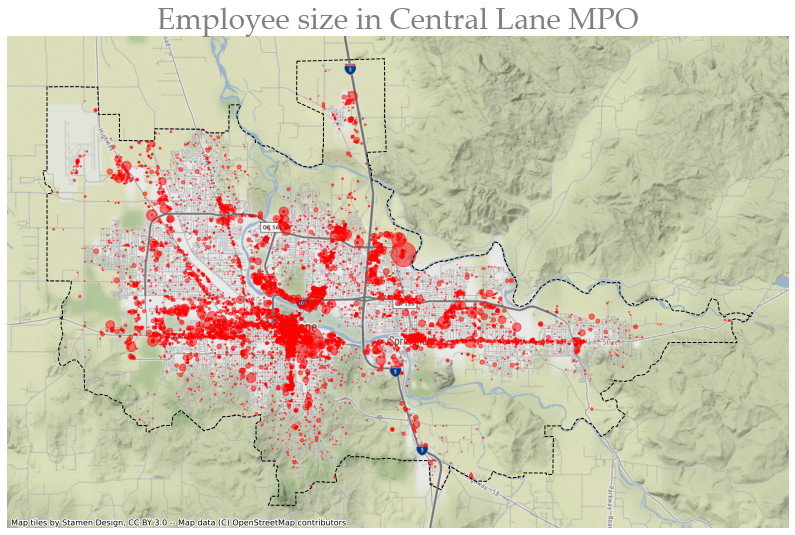

In [65]:
fig, ax = plt.subplots(figsize=(14, 12))
business.plot(ax=ax, marker='o', markersize=values, color='red', alpha=.5, legend=True, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
ctx.add_basemap(ax)
plt.title("Employee size in Central Lane MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [67]:
values = standardization(business['location_sales_volume_actual'].astype(int)) * 1000
values

0        1.817789
1        0.475613
2        0.385969
3        0.804310
4        0.183439
           ...   
10785    1.435141
10786    0.522926
10787    0.183439
10788    0.035692
10789    0.858262
Name: location_sales_volume_actual, Length: 10790, dtype: float64

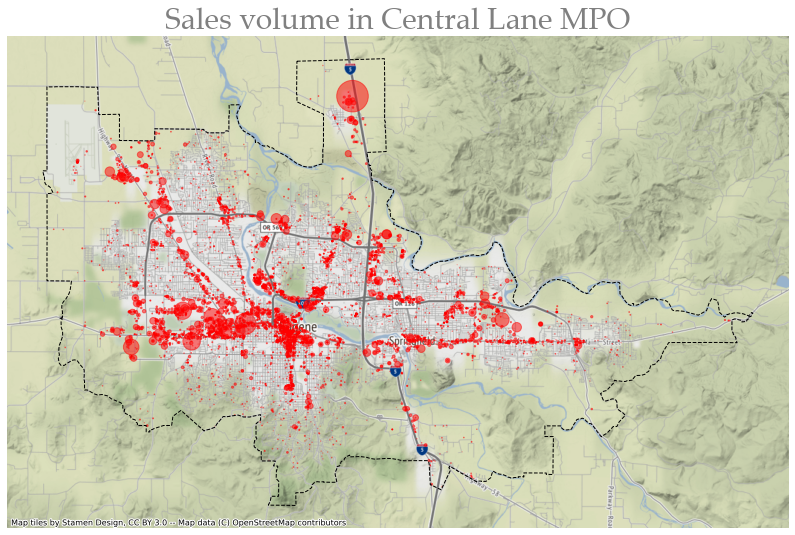

In [68]:
fig, ax = plt.subplots(figsize=(14, 12))
business.plot(ax=ax, marker='o', markersize=values, color='red', alpha=.5, legend=True, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
ctx.add_basemap(ax)
plt.title("Sales volume in Central Lane MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [95]:
large = business[business['location_employee_size_actual'].astype(int) > 100]

In [96]:
values = standardization(large['location_employee_size_actual'].astype(int)) * 1000

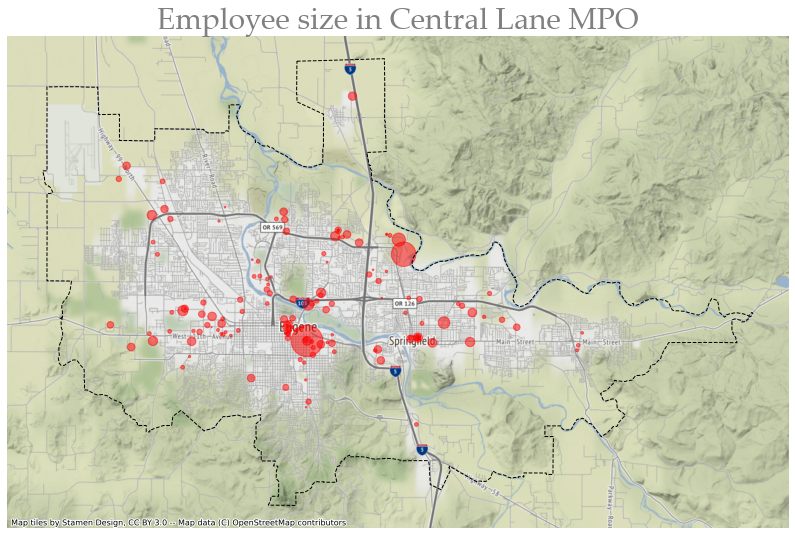

In [97]:
fig, ax = plt.subplots(figsize=(14, 12))
large.plot(ax=ax, marker='o', markersize=values, color='red', alpha=.5, legend=True, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', aspect=1)
ctx.add_basemap(ax)
plt.title("Employee size in Central Lane MPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [89]:
from arcpy import env
from arcpy.sa import *

# Set environment settings
env.workspace = outpath

# Set local variables
inFeatures = "business_MPO.shp"
populationField = "empl_siz_a"
cellSize = 60
searchRadius = 4


# Check out the ArcGIS Spatial Analyst extension license
arcpy.CheckOutExtension("Spatial")

'NotLicensed'

In [ ]:
# Execute KernelDensity
outKernelDensity = KernelDensity(inFeatures, populationField, cellSize,
                                 searchRadius, "SQUARE_KILOMETERS")

In [ ]:
# Save the output 
outKernelDensity.save("kerneldout")